In [ ]:
# All the necessary libraries are imported 
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from tqdm import tqdm
import seaborn as sns 
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline
import matplotlib.patches as mpatches

In [ ]:
# The dataset which is in csv format is read here
data = pd.read_csv('adult.csv')
# The column names from the dataset are added to the dataframe
data.columns = ['age', 'workclass', 'fnlwgt', 'education',
                     'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex',
                     'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

In [ ]:
# The data preprocessing begins from here where all the missing values (?) are located and replaced by a nan value

df = data.replace(' ?', np.nan)
df.shape
# Rows which consist of a nan value are fully eliminated
df = df.dropna(axis = 0, how='any')

In [ ]:
df.shape

<function matplotlib.pyplot.show(close=None, block=None)>

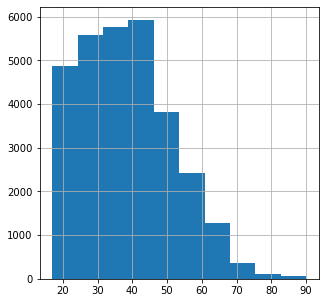

In [5]:
df['age'].hist(figsize = (5,5))
plt.show

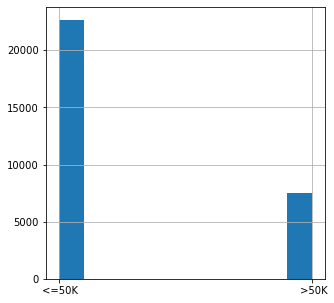

In [6]:
df['income'].hist(figsize = (5,5))
plt.show()

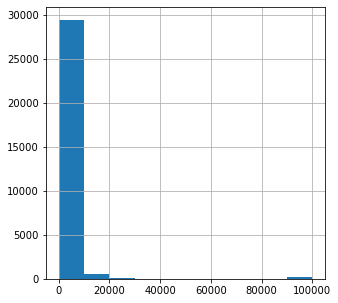

In [7]:
df['capital_gain'].hist(figsize=(5,5))
plt.show()

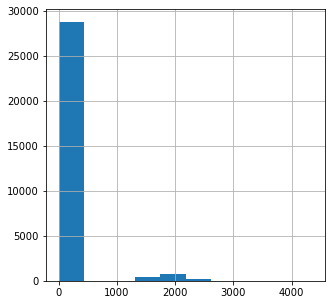

In [8]:
df['capital_loss'].hist(figsize=(5,5))
plt.show()

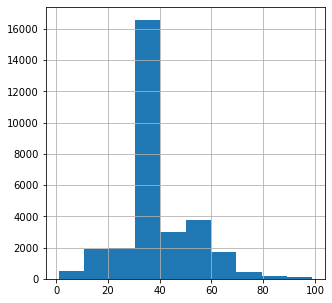

In [9]:
df['hours_per_week'].hist(figsize=(5,5))
plt.show()

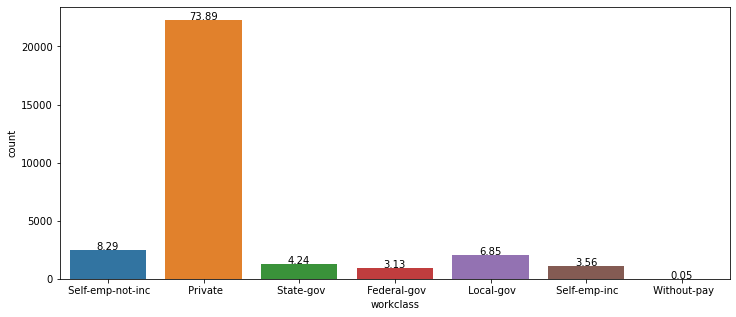

In [10]:
plt.figure(figsize=(12,5))

total = float(len(df['income']))

a = sns.countplot(x='workclass',data=df)

for f in a.patches:
    height = f.get_height()
    a.text(f.get_x() + f.get_width()/2., height+3, '{:1.2f}'.format((height/total)*100),ha="center")
plt.show()

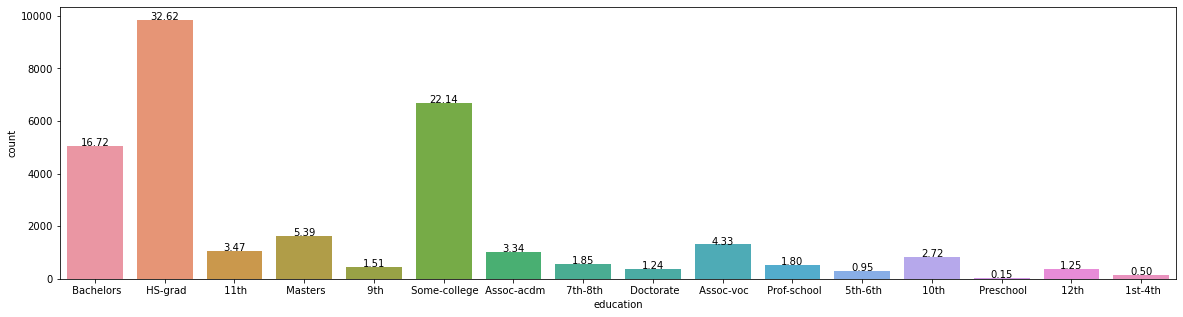

In [11]:
plt.figure(figsize=(20,5)) # we can group these into 4 types 

a= float(len(['income']))

a= sns.countplot(x='education',data=df)
for s in a.patches:
    height = s.get_height()
    a.text(s.get_x()+s.get_width()/2.,height+3,'{:1.2f}'.format((height/total)*100),ha='center')
plt.show()

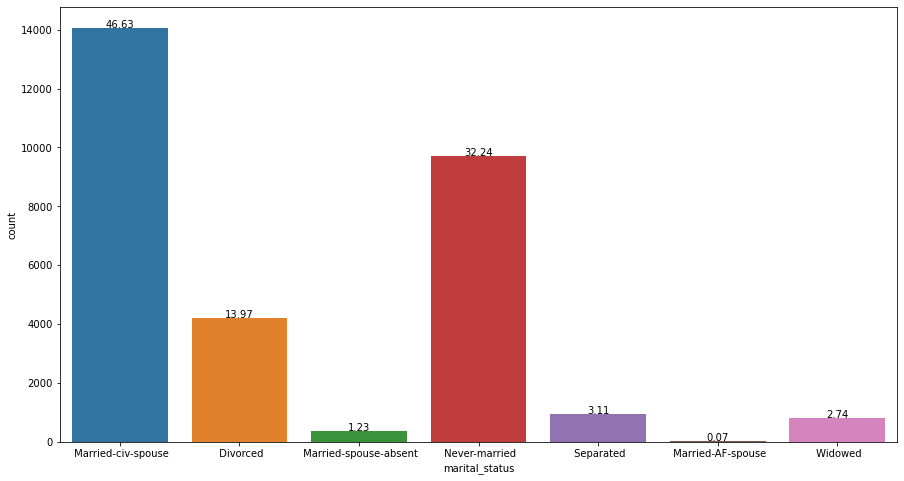

In [12]:
plt.figure(figsize=(15,8))
total = float(len(df) )

ax = sns.countplot(x="marital_status", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

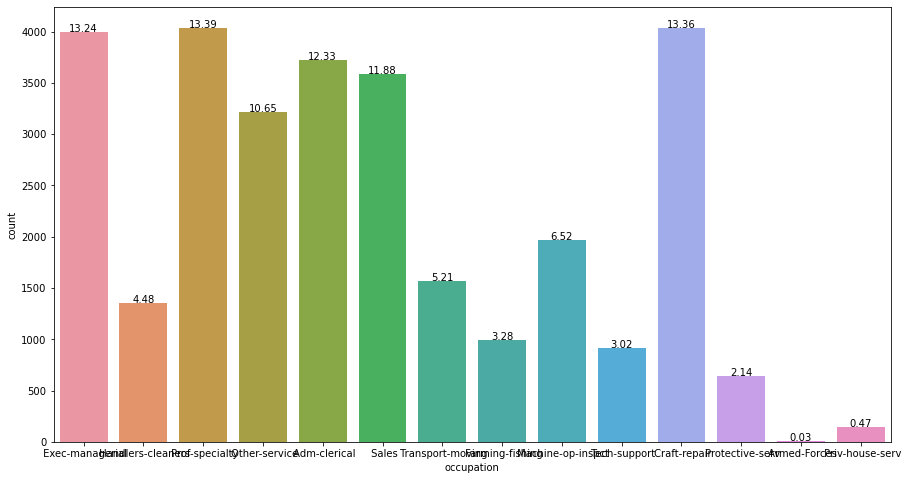

In [13]:
plt.figure(figsize=(15,8))
total = float(len(df) )

ax = sns.countplot(x="occupation", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

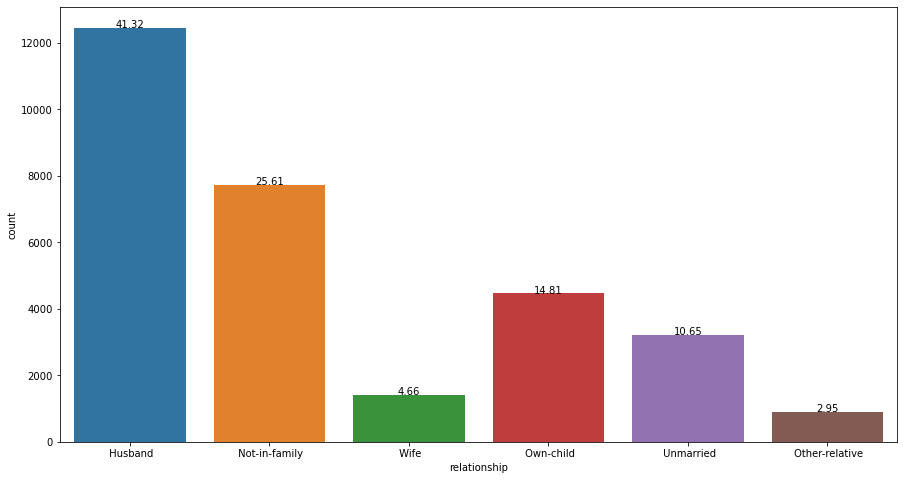

In [14]:
plt.figure(figsize=(15,8))
total = float(len(df) )

ax = sns.countplot(x="relationship", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

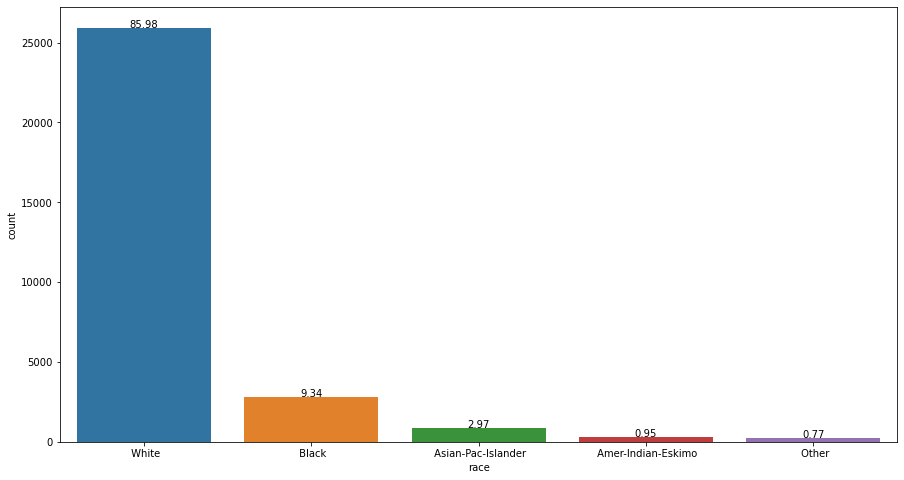

In [15]:
plt.figure(figsize=(15,8))
total = float(len(df) )

ax = sns.countplot(x="race", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

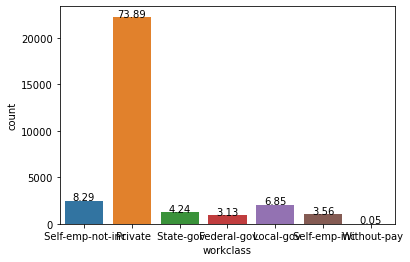

In [16]:
# plt.figure(figsize=(5,5))
total = float(len(df) )

ax = sns.countplot(x="workclass", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

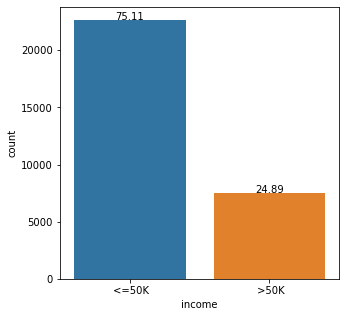

In [17]:
plt.figure(figsize=(5,5))
total = float(len(df) )

ax = sns.countplot(x="income", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

In [18]:
# Column names are renamed here for a better readability
df.rename(columns={'capital_gain': 'capital gain', 'capital_loss': 'capital loss', 'native_country': 'country','hours_per_week': 'hours per week','marital_status': 'marital'}, inplace=True)
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital',
       'occupation', 'relationship', 'race', 'sex', 'capital gain',
       'capital loss', 'hours per week', 'country', 'income'],
      dtype='object')

In [19]:
# Here the columns with a non numerical value are converted into a categorial type
# after which they are converted into codes wihch specify the initial category the values were in for 
# easier modelling of the data
df['workclass'] = df['workclass'].astype('category')
df['education'] = df['education'].astype('category')
df['marital'] = df['marital'].astype('category')
df['occupation'] = df['occupation'].astype('category')
df['relationship'] = df['relationship'].astype('category')
df['race'] = df['race'].astype('category')
df['sex'] = df['sex'].astype('category')
df['country'] = df['country'].astype('category')

df['workclass'] = df['workclass'].cat.codes.astype('category')
df['education'] = df['education'].cat.codes.astype('category')
df['marital'] = df['marital'].cat.codes.astype('category')
df['occupation'] = df['occupation'].cat.codes.astype('category')
df['relationship'] = df['relationship'].cat.codes.astype('category')
df['race'] = df['race'].cat.codes.astype('category')
df['sex'] = df['sex'].cat.codes.astype('category')
df['country'] = df['country'].cat.codes.astype('category')

In [20]:
from sklearn.preprocessing import StandardScaler
# The data is scaled using a standard scaler to minimize the variance differences between columns
# this will ensure the data gives much accurate results
sc = StandardScaler()
df[['age','workclass','fnlwgt','education','education_num','marital','occupation','relationship','race','sex','capital gain', 'capital loss', 'hours per week','country']] = sc.fit_transform(df[['age','workclass','fnlwgt','education','education_num','marital','occupation','relationship','race','sex','capital gain', 'capital loss', 'hours per week','country']])

In [21]:
df.head()

age  workclass    fnlwgt  education  education_num   marital  \
0  0.880275   1.888018 -1.007909  -0.349871       1.128961 -0.387243   
1 -0.033338  -0.208884  0.244659   0.174749      -0.439703 -1.722362   
2  1.108678  -0.208884  0.425206  -2.448351      -1.224035 -0.387243   
3 -0.794682  -0.208884  1.406626  -0.349871       1.128961 -0.387243   
4 -0.109472  -0.208884  0.897147   0.437059       1.521127 -0.387243   

   occupation  relationship      race       sex  capital gain  capital loss  \
0   -0.734609     -0.885732  0.385055  0.692823     -0.147437      -0.21859   
1   -0.238260     -0.261254  0.385055  0.692823     -0.147437      -0.21859   
2   -0.238260     -0.885732 -2.010994  0.692823     -0.147437      -0.21859   
3    0.754439      2.236660 -2.010994 -1.443370     -0.147437      -0.21859   
4   -0.734609      2.236660  0.385055 -1.443370     -0.147437      -0.21859   

   hours per week   country  income  
0       -2.331495  0.264929   <=50K  
1       -0.077735  0.264929   <=50K  
2       -0.077735  0.264929   <=50K  
3       -0.077735 -5.303944   <=50K  
4       -0.077735  0.264929   <=50K

In [22]:
# The output is converted into a binary output for accurate model fitting
df = df.replace(' <=50K',0)
df = df.replace(' >50K',1)
df=df.head(1000)

In [23]:
df = df[['age','workclass','fnlwgt','education','education_num','marital','occupation','relationship','race','sex','capital gain', 'capital loss', 'hours per week','country','income']]

train_df,test_df = train_test_split(df,train_size=0.8)

In [24]:
class LogisticRegression:
    
    def __init__(self, learningRate, tolerance, maxIteration = 5):
        
        self.learningRate = learningRate
        self.tolerance = tolerance
        self.maxIteration = maxIteration
    
    def datasetReader(self, train_df, test_df):
        
        # The dataset is split here into a training and testing set and all the column types are
        # converted into floating types
        train_df, test_df = np.array(train_df, dtype = np.float64), np.array(test_df, dtype=np.float64)
        X_train, y_train = train_df[:, 1:] , train_df[:, -1]
        X_test, y_test = test_df[:, 1:] , test_df[:, -1]
        
        return X_train, y_train, X_test, y_test
    
    def sigmoid(self, z):
        sig = 1 / (1+np.exp(-z))
        return sig
    
    def costFunction(self, X, y):

        lambda_ = .0001
        sig = self.sigmoid(X.dot(self.w))
        #return (-((y.T@np.log(h)) + (one-y).T@np.log(one - h))/(y.shape[0]))
        one = np.ones((y.shape[0],1))
        #pred_ = y * np.log(sig) + (one-y) * np.log(one - sig)
        pred_ = (-((y.T*np.log(sig)) + (one -y ).T * np.log(one - sig))/y.shape[0])
        reg = (lambda_/(y.shape[0]))*(self.w)#L1 Regularisation
        #reg = (lambda_/2*(y.shape[0]))*((self.w)*(self.w)) #L2 Regularisation
        reg = reg.sum()
        cost = pred_.sum()
        cost = cost + reg
        
        return cost
    
    def gradient(self, X, y):                                        
        sig = self.sigmoid(X.dot(self.w))
        grad = (sig - y).dot(X)

        return grad
    
    def gradientDescent(self, X, y):

        costSequence = []
        lastCost = float('inf')
        for i in tqdm(range(self.maxIteration)):
            self.w = self.w - self.learningRate * self.gradient(X, y)
            print(self.w)
            currentCost = self.costFunction(X, y)
            diff = lastCost - currentCost
            print(currentCost)
            lastCost = currentCost
            costSequence.append(currentCost)

            if diff < self.tolerance:
                print('The Model Stopped - No Further Improvement')
                break
        self.plotCost(costSequence)

        return
    
    def plotCost(self, costSequence):

        s = np.array(costSequence)
        t = np.arange(s.size)

        fig, ax = plt.subplots()
        ax.plot(t, s)

        ax.set(xlabel = 'iterations', ylabel = 'cost', title = 'cost trend')
        ax.grid()

        plt.legend(bbox_to_anchor = (1.05, 1), shadow = True)
        plt.show()

    def predict(self, X):

        sig = self.sigmoid(X.dot(self.w))
        return np.around(sig)

    def evaluate(self, y, y_hat):  
        y = (y == 1)
        y_hat = (y_hat == 1)
        
        print(confusion_matrix(y, y_hat))
        accuracy = ((y == y_hat).sum()) / y.size
        precision = ((y & y_hat).sum()) / y_hat.sum()
        recall = ((y & y_hat).sum()) / y.sum()

        return accuracy, recall, precision
       
    def runModel(self,train_df,test_df):
        
        self.train_df = train_df
        self.test_df = test_df
        self.X_train, self.y_train, self.X_test, self.y_test = self.datasetReader(train_df,test_df)
        print(self.X_train.shape)
        self.w = np.ones(self.X_train.shape[1], dtype = np.float64) * 0
        self.gradientDescent(self.X_train, self.y_train)
        print("SELF.W:",self.w)

        y_hat_train = self.predict(self.X_train)
        accuracy, recall, precision = self.evaluate(self.y_train, y_hat_train)
        
        print('Training Accuracy: ', accuracy)
        print('Training Precision: ', precision)
        print('Training Recall: ', recall)
        

In [25]:
# MODEL 1 - LOGISTIC REGRESSION

# The logistic regression model is fitted on the dataset to see how the input is behaving to predict an output
lr = LogisticRegression(tolerance=0.0001, learningRate=0.0000001)

100%|██████████| 5/5 [00:00<00:00, 86.55it/s]
No handles with labels found to put in legend.


(800, 14)
[ 1.80841683e-06 -3.78057364e-07  1.48887868e-06  1.10151401e-05
 -7.89208379e-06 -6.91677532e-07 -9.21630813e-06  3.07683122e-06
  6.85883592e-06  5.04586321e-06  4.62825815e-06  8.56812537e-06
 -5.51068955e-07  1.01500000e-05]
554.5151594288193
[ 3.61673315e-06 -7.56065325e-07  2.97763269e-06  2.20299376e-05
 -1.57838798e-05 -1.38339334e-06 -1.84322039e-05  6.15351385e-06
  1.37173354e-05  1.00916826e-05  9.25633474e-06  1.71358919e-05
 -1.10214579e-06  2.02998421e-05]
554.5125747176096
[ 5.42494895e-06 -1.13402389e-06  4.46626203e-06  3.30443924e-05
 -2.36753880e-05 -2.07514742e-06 -2.76476874e-05  9.23004789e-06
  2.05754984e-05  1.51374582e-05  1.38842298e-05  2.57032996e-05
 -1.65323050e-06  3.04495264e-05]
554.5099903142985
[ 7.23306425e-06 -1.51193305e-06  5.95476670e-06  4.40585045e-05
 -3.15666084e-05 -2.76693978e-06 -3.68627587e-05  1.23064334e-05
  2.74333250e-05  2.01831900e-05  1.85119432e-05  3.42703485e-05
 -2.20432309e-06  4.05990528e-05]
554.5074062188589
[ 

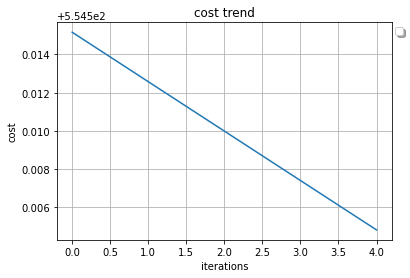

SELF.W: [ 9.04107904e-06 -1.88979283e-06  7.44314672e-06  5.50722739e-05
 -3.94575410e-05 -3.45877040e-06 -4.60774176e-05  1.53826703e-05
  3.42908151e-05  2.52288781e-05  2.31394752e-05  4.28370386e-05
 -2.75542356e-06  5.07484213e-05]
[[363 234]
 [ 24 179]]
Training Accuracy:  0.6775
Training Precision:  0.43341404358353514
Training Recall:  0.8817733990147784


In [26]:
# The model is executed here on the training set and the output is given from the testing set
lr.runModel(train_df,test_df)

100%|██████████| 5/5 [00:00<00:00, 85.37it/s]
No handles with labels found to put in legend.


(800, 6)
[-3.21051694e-07  1.11571519e-05  4.96539803e-06  3.58147482e-06
  8.85135840e-06  1.01000000e-05]
554.5162704526196
[-6.42073617e-07  2.23140089e-05  9.93076203e-06  7.16282896e-06
  1.77024716e-05  2.01998903e-05]
554.5147965799481
[-9.63065770e-07  3.34705710e-05  1.48960920e-05  1.07440624e-05
  2.65533397e-05  3.02996710e-05]
554.5133228299349
[-1.28402816e-06  4.46268381e-05  1.98613880e-05  1.43251752e-05
  3.54039627e-05  4.03993421e-05]
554.5118492025725
[-1.60496077e-06  5.57828104e-05  2.48266499e-05  1.79061673e-05
  4.42543405e-05  5.04989035e-05]
554.5103756978536


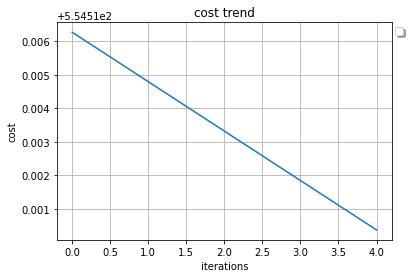

SELF.W: [-1.60496077e-06  5.57828104e-05  2.48266499e-05  1.79061673e-05
  4.42543405e-05  5.04989035e-05]
[[399 199]
 [  6 196]]
Training Accuracy:  0.74375
Training Precision:  0.4962025316455696
Training Recall:  0.9702970297029703


In [36]:
#numerical columns
df1 = df[['age','fnlwgt','education_num','capital gain', 'capital loss', 'hours per week','income']]
train_df,test_df = train_test_split(df1,train_size=0.8)
lr.runModel(train_df,test_df)

In [28]:
X = df[df.columns[0:1]]
y = df[["income"]]
from sklearn.linear_model import LogisticRegression
LRG = LogisticRegression(solver = 'saga',multi_class = 'auto'
).fit(X, y)
LRG.score(X, y)

/Users/rehulghag/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.74

In [29]:
class SVM:
    
    def __init__(self, learningRate = 0.00001, lambdaParam = 0.001, nIters = 100):
        
        self.learningRate = learningRate
        self.lambdaParam = lambdaParam
        self.nIters = nIters

    def fit(self, X, y):
        nSamples, nFeatures = X.shape
        self.w = np.zeros(nFeatures)
        self.b = 0

        for _ in range(self.nIters):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.w) + self.b) >= 1

                if condition:
                    self.w -= self.learningRate * (2 * self.lambdaParam * self.w)

                else:
                    self.w -= self.learningRate * (2 * self.lambdaParam * self.w - y[idx] * x_i)
                    self.b -= self.learningRate * (-y[idx])

    def predict(self, X):
        approx = np.dot(X, self.w) + self.b
        return np.sign(approx)
     

In [30]:
# MODEL 2 - SVM
# An SVM model is fitted on the dataset to see how the dataset works on this model
clf = SVM()

In [31]:
# The dataframe is split into an input X and output y
y = df[["income"]]
X = df.drop('income', axis = 1)
# The dataframes are converted into a numpy array data type
X = X.to_numpy()
y = y.to_numpy()
# The datasets are split into a training and testing set where 70% of the data is
# the training set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
clf.fit(X_train, y_train)

In [32]:
print(clf.w)

[ 0.05646647  0.00767572  0.00024537  0.01579448  0.09958774 -0.05879367
 -0.00829509 -0.04718385  0.01162582  0.04523313  0.02182446  0.03653514
  0.07809831  0.00348094]


In [33]:
print(clf.b)

[0.164]


In [34]:
# Printing the predicted values using the X_test data
print(clf.predict(X_test))

[ 1.  1. -1.  1.  1.  1.  1. -1.  1. -1.  1. -1. -1.  1.  1.  1.  1.  1.
  1. -1.  1.  1. -1. -1.  1.  1.  1. -1. -1.  1.  1.  1. -1.  1. -1.  1.
 -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1. -1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1.  1.
  1. -1.  1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.
  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1. -1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.
 -1.  1.  1. -1.  1.  1. -1.  1. -1.  1. -1.  1.  1.  1. -1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1. -1. -1.  1.  1.  1. -1.
  1.  1.  1.  1.  1.  1.  1. -1.  1.  1. -1.  1. -1. -1.  1. -1. -1. -1.
 -1. -1.  1.  1.  1.  1. -1.  1.  1.  1. -1. -1.  1.  1.  1.  1. -1.  1.
  1.  1. -1.  1.  1.  1.  1.  1. -1. -1.  1.  1.  1.  1.  1.  1.  1. -1.
  1.  1.  1.  1.  1.  1.  1.  1. -1. -1.  1.  1.  1.  1.  1. -1.  1.  1.
  1.  1.  1. -1.  1.  1.  1. -1. -1. -1. -1.  1.  1

In [35]:
import tensorflow.keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Input, MaxPool2D, Dense, Conv2D, Dropout


ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
def load_dataset():
    train_dataset = h5py.File('train_signs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [ ]:
# MODEL 3 - NEURAL NETWORKS
# The neural network model is implemented to fit the data and to check for the prediction accuracy 
model = Sequential()
# 4 layers are added for the model 
model.add(Dense(128, kernel_initializer = 'normal', input_dim = 14, activation = 'relu'))
model.add(Dense(256, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dense(256, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dense(256, kernel_initializer = 'normal', activation = 'relu'))
# A sigmoid acitvation is used because the output is in a binary format
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()

In [ ]:
model.fit(X_train, y_train, batch_size=64, epochs=2)

In [ ]:
results = model.evaluate(X_test, y_test, batch_size=128)
results